# Import packages

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Prepare the data

In [3]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Split the training data into training and validation sets
x_train, x_val = x_train[:50000], x_train[50000:]
y_train, y_val = y_train[:50000], y_train[50000:]

# Train the model

Epoch 1/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.2614 - accuracy: 0.9233 - val_loss: 0.1258 - val_accuracy: 0.9619
Epoch 2/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.1111 - accuracy: 0.9660 - val_loss: 0.1063 - val_accuracy: 0.9692
Epoch 3/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.0772 - accuracy: 0.9761 - val_loss: 0.0983 - val_accuracy: 0.9717
Epoch 4/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.0565 - accuracy: 0.9823 - val_loss: 0.0971 - val_accuracy: 0.9725
Epoch 5/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.0457 - accuracy: 0.9859 - val_loss: 0.0804 - val_accuracy: 0.9771
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0358 - accuracy: 0.9888 - val_loss: 0.0914 - val_accuracy: 0.9750
Epoch 7/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.0277 - accuracy: 0.9913 - val_loss: 0.0973 - val

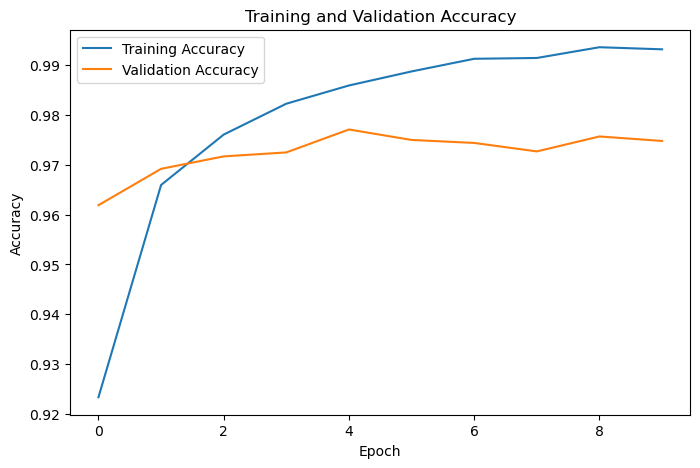

In [4]:
# Build the neural network model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),  # First hidden layer
    layers.Dense(64, activation='relu'),   # Second hidden layer
    layers.Dense(10, activation='softmax') # Output layer
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

# Plot training and validation accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Predict the test data

313/313 [==============================] - 1s 3ms/step


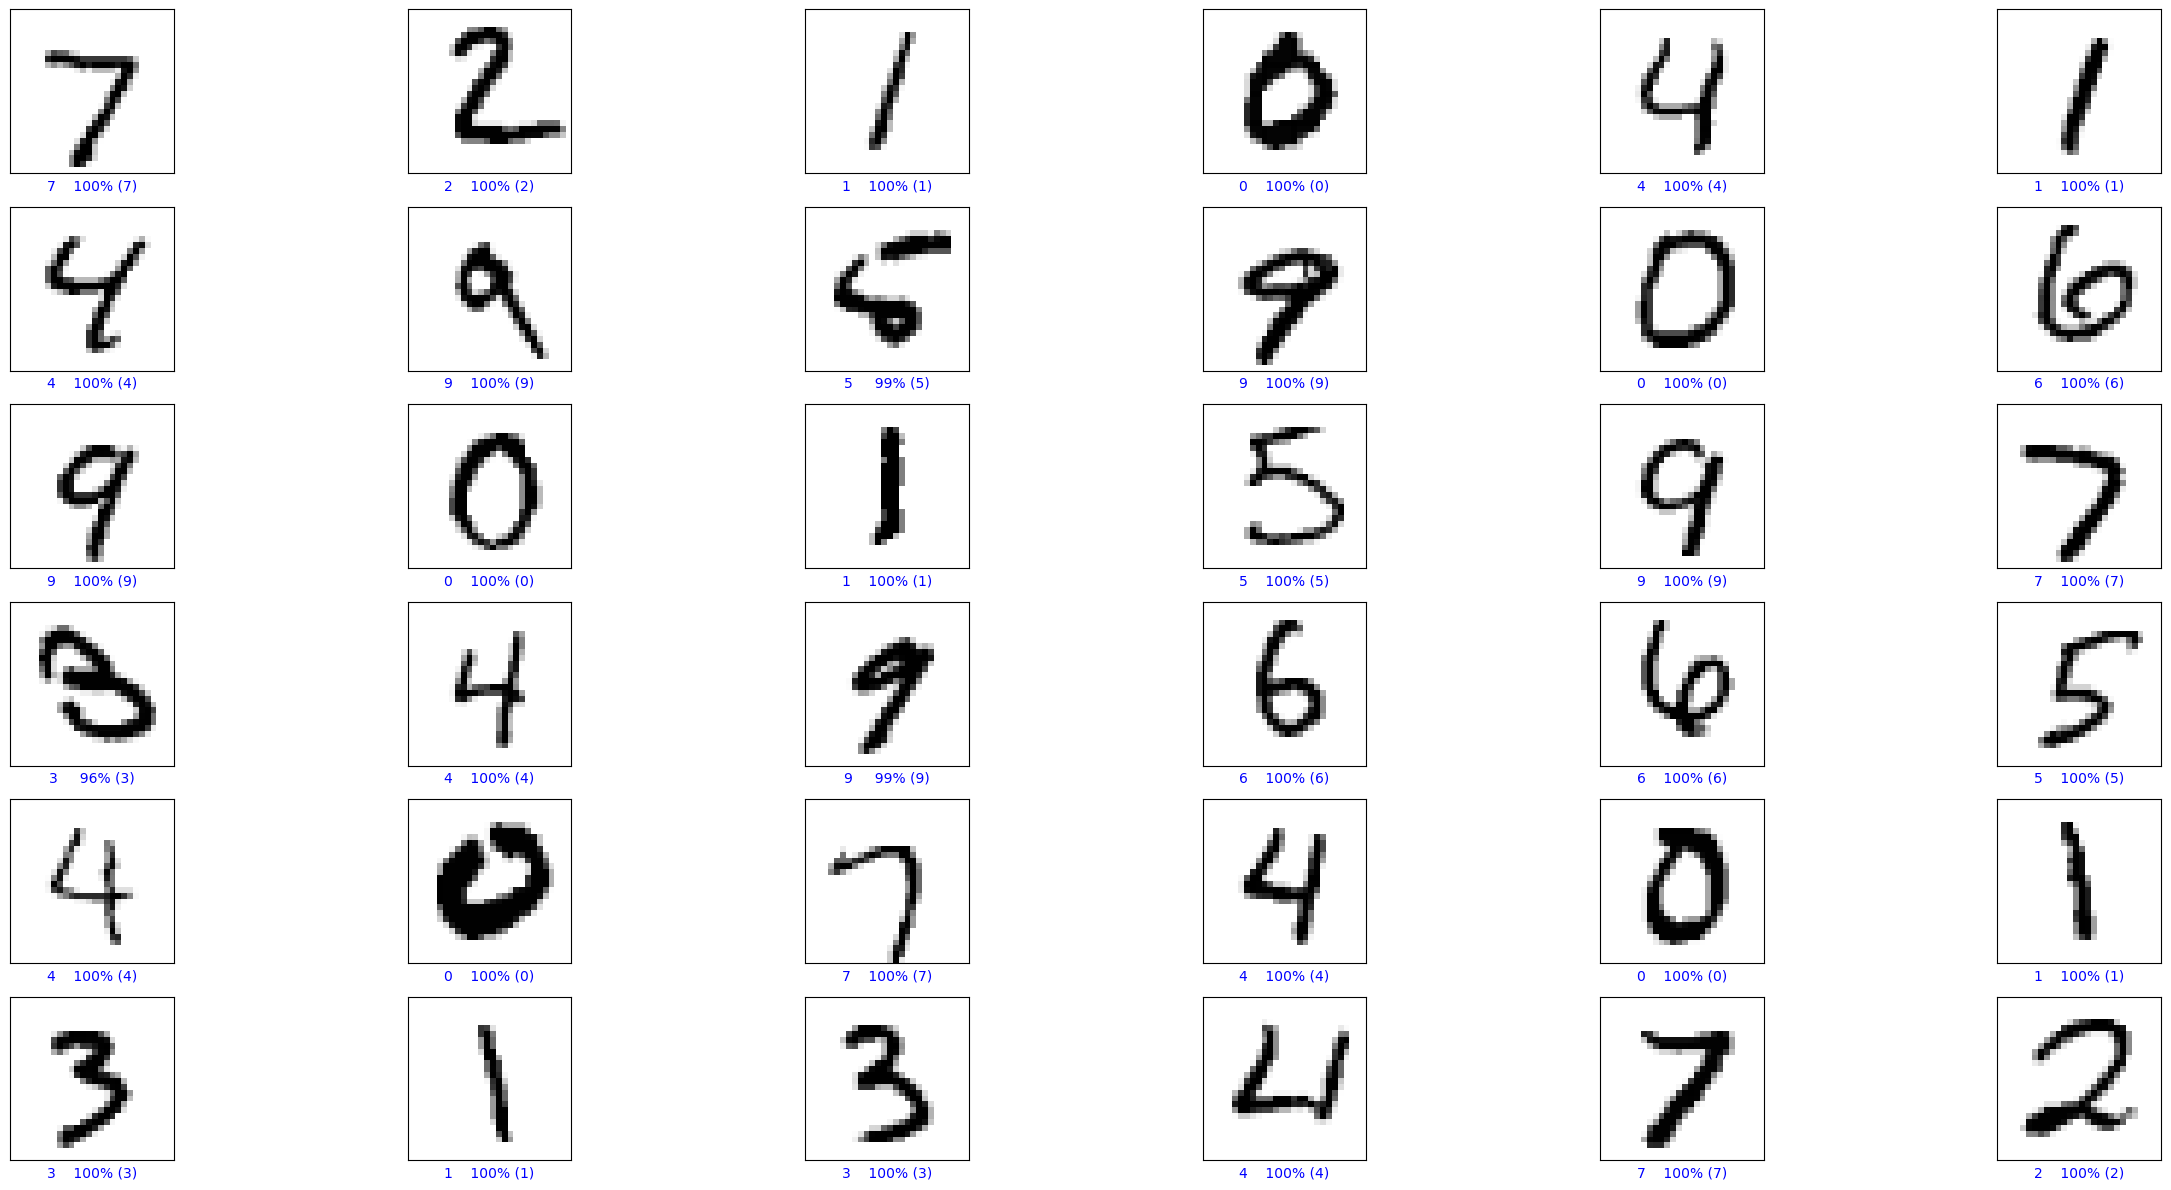

In [6]:
# Predictions and visualization of results
predictions = model.predict(x_test)

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:6.0f}% ({})".format(predicted_label,
                                  100*np.max(predictions_array),
                                  true_label),
                                  color=color)

# Display some of the predictions
num_rows = 6
num_cols = 6
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], y_test, x_test)
plt.tight_layout()
plt.show()